In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path 
import os.path 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split 
import tensorflow as tf 

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data_dir = Path('images')

In [3]:
filepath = list(data_dir.glob(r'**/*.jpg'))

In [7]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

In [8]:
labels

['apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'apple_pie',
 'appl

In [9]:
filepath = pd.Series(filepath, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepath, labels], axis=1)

In [10]:
images

,Filepath,Label
0,images\apple_pie\1005649.jpg,apple_pie
1,images\apple_pie\1011328.jpg,apple_pie
2,images\apple_pie\101251.jpg,apple_pie
3,images\apple_pie\1014775.jpg,apple_pie
4,images\apple_pie\1026328.jpg,apple_pie
...,...,...
100995,images\waffles\981485.jpg,waffles
100996,images\waffles\98238.jpg,waffles
100997,images\waffles\982668.jpg,waffles
100998,images\waffles\995085.jpg,waffles


In [11]:
category_samples = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_samples.append(category_slice.sample(100, random_state=1))
image_df = pd.concat(category_samples, axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [12]:
image_df

,Filepath,Label
0,images\paella\1769909.jpg,paella
1,images\steak\2815172.jpg,steak
2,images\bread_pudding\272991.jpg,bread_pudding
3,images\waffles\1854304.jpg,waffles
4,images\french_toast\3009499.jpg,french_toast
...,...,...
10095,images\croque_madame\3389786.jpg,croque_madame
10096,images\poutine\227190.jpg,poutine
10097,images\breakfast_burrito\790446.jpg,breakfast_burrito
10098,images\guacamole\2979136.jpg,guacamole


In [13]:
image_df['Label'].value_counts()

Label
paella                  100
red_velvet_cake         100
baby_back_ribs          100
shrimp_and_grits        100
cup_cakes               100
                       ... 
takoyaki                100
pad_thai                100
fried_rice              100
strawberry_shortcake    100
apple_pie               100
Name: count, Length: 101, dtype: int64

In [8]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np



K.clear_session()

n_classes = 3
img_width, img_height = 224, 224
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [ ]:
# train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [4]:
# train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
#     validation_split=0.2
# )

# test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
# )

In [ ]:
# train_images = train_generator.flow_from_dataframe(
#     dataframe = train_df,
#     x_col = 'Filepath',
#     y_col = 'Label',
#     target_size=(224,224),
#     color_mode = 'rgb',
#     class_mode = 'categorical',
#     batch_size = 32,
#     shuffle = True,
#     seed = 42, 
#     subset='training'
# )

# val_images = train_generator.flow_from_dataframe(
#     dataframe = train_df,
#     x_col = 'Filepath',
#     y_col = 'Label',
#     target_size=(224,224),
#     color_mode = 'rgb',
#     class_mode = 'categorical',
#     batch_size = 32,
#     shuffle = True,
#     seed = 42, 
#     subset='validation'
# )

# test_images = test_generator.flow_from_dataframe(
#     dataframe = test_df,
#     x_col = 'Filepath',
#     y_col = 'Label',
#     target_size=(224,224),
#     color_mode = 'rgb',
#     class_mode = 'categorical',
#     batch_size = 32,
#     shuffle = False
# )

In [9]:
pretrained_model = tf.keras.applications.InceptionV3(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [10]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(224, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(224, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,312,835 (85.12 MB)

 Trainable params: 510,051 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

None


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights = True
        )
    ]
)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 90s 569ms/step - accuracy: 0.7023 - loss: 0.6802 - val_accuracy: 0.8533 - val_loss: 0.3432
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 558ms/step - accuracy: 0.8522 - loss: 0.3781 - val_accuracy: 0.8827 - val_loss: 0.3083
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 560ms/step - accuracy: 0.8559 - loss: 0.3643 - val_accuracy: 0.8773 - val_loss: 0.3283
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 79s 551ms/step - accuracy: 0.8589 - loss: 0.3485 - val_accuracy: 0.9013 - val_loss: 0.2771
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 77s 538ms/step - accuracy: 0.8793 - loss: 0.2978 - val_accuracy: 0.8760 - val_loss: 0.3121
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 78s 545ms/step - accuracy: 0.8556 - loss: 0.3364 - val_accuracy: 0.8213 - val_loss: 0.4617
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 99s 693ms/step - accuracy: 0.8905 - loss: 0.2972 - val_accuracy: 0.9027 - val_loss: 0.2717
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 95s 660ms/step - accuracy: 0.8886 - loss: 0

In [13]:
results = model.evaluate(test_generator, verbose=0)
print("Test Accuracy: {:.2f}%" .format(results[1] * 100))

Test Accuracy: 91.33%


In [14]:
results = model.evaluate(train_generator, verbose=0)
print("Train Accuracy: {:.2f}%" .format(results[1] * 100))

Train Accuracy: 91.69%


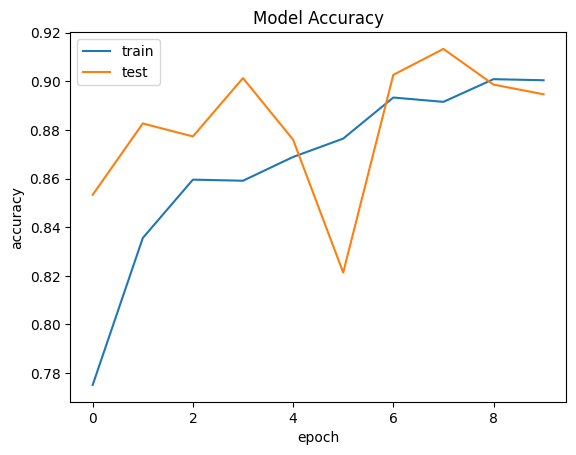

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

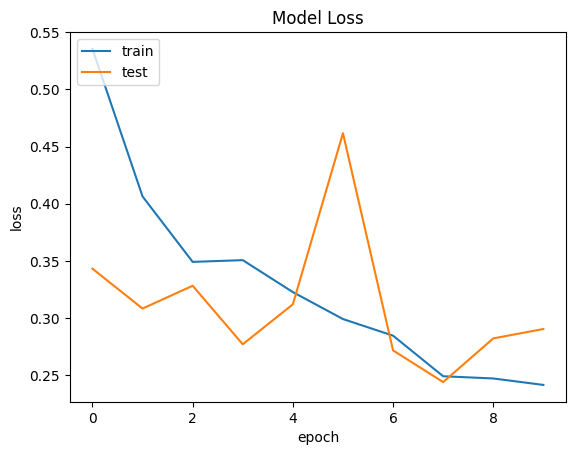

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()